# Parsers para Gramáticas independientes de contexto

## Requerimientos técnicos
- Python 3
- nltk
- matplotlib

In [2]:
import nltk 
import re 
import os, sys
import matplotlib 

## Recursive descent Parser

- **Top-down**
- Parte del símbolo de inicio y aplica las reglas para obtener los constituyentes inmediatos y armar el árbol hasta llegar a los símbolos terminales. Chequea coincidencia con la secuencia del input. Si no hay coincidencia, tiene que retroceder y buscar diferentes alternativas de parseo. 

In [3]:
# Recursive Descent Parser

def rd_parser(sentence, grammar):                   # define una función llamada rd_parser con dos argumentos
    print(grammar)                                  # imprime mi gramática
    sentence = sentence.lower()                     # convierte a minúscula la oración
    if sentence.endswith('.'):                      # si la oración termina con un punto
        sent = re.sub('\.',' ',sentence)            # se lo quita
    else:                                           # si no
        sent = sentence                             # la toma como está
    sent = sent.split()                             # divide la oración en palabras
    rd_parser = nltk.RecursiveDescentParser(grammar) # proceso esas palabras
    for tree in rd_parser.parse(sent):              # para cada árbol posible en mi gramática para esa oración
        print(tree)                                 # lo imprimo
        return(tree)

Escribí una oración:
Cata fuma
Grammar with 40 productions (start state = O)
    O -> SN SV
    SN -> PRO
    SN -> NP
    SN -> D NC
    NP -> 'martín'
    NP -> 'cata'
    NP -> 'julia'
    NP -> 'fede'
    NP -> 'maca'
    NP -> 'pablo'
    NC -> 'plaza'
    NC -> 'facultad'
    NC -> 'regalo'
    NC -> 'globo'
    NC -> 'tabaco'
    D -> 'el'
    D -> 'la'
    D -> 'un'
    D -> 'una'
    PRO -> 'ella'
    PRO -> 'él'
    SV -> FV SN SP
    SV -> FV SP
    SV -> FV
    SV -> FV SN
    FV -> AUX PART
    FV -> V
    AUX -> 'fue'
    PART -> 'entregado'
    PART -> 'enviado'
    PART -> 'fumado'
    PART -> 'explotado'
    V -> 'entregó'
    V -> 'envió'
    V -> 'explotó'
    V -> 'fuma'
    SP -> P SN
    P -> 'por'
    P -> 'en'
    P -> 'a'
(O (SN (NP cata)) (SV (FV (V fuma))))


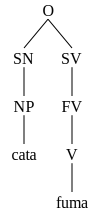

In [6]:
#Para correr el Recursive Descent Parser

print('Escribí una oración:')                          # Para que me pida que escriba una oración
oracion1 = input()                                     # Para que me abra un campo en el que escriba la oración
grammar = nltk.data.load('gramaticas/CFG.cfg')     # establece cuál va a ser mi gramática
rd_parser(oracion1, grammar)                           # Para correr la función

# Oraciones que acepta la gramática: 
# Cata/Martín/Julia/Maca/Pablo fuma
# Cata/Martín/Julia/Maca/Pablo entregó/envió el/la/un/una plaza/facultad/regalo/globo/tabaco

**Demo del Right Descent Parser**

In [7]:
nltk.app.rdparser()

### Shift Reduce Parser

In [ ]:
# Shift Reduce Parser

def sr_parser(sentence, grammar):                      # define la función sr_parser con dos argumentos
    print(grammar)                                     # imprimte la gramática
    sentence = sentence.lower()                        # convierte a minúscula
    if sentence.endswith('.'):                         # si la oración termina con un punto
        sent = re.sub('\.',' ',sentence)               # se lo quita
    else:                                              # si no
        sent = sentence                                # la toma como está
    sent = sent.split()                                # divide la oración en palabras
    sr_parser = nltk.ShiftReduceParser(grammar)        # proceso esas palabras
    for tree in sr_parser.parse(sent):                 # para cada árbol posible en mi gramática para esa oración
        print(tree)                                    # lo imprimo
        return(tree)                                   # lo dibujo

In [ ]:
print('Escribí una oración:')                       # imprime un mensaje pidiendo que escriba una oración
oracion2 = input()                                  # asigna a una variable mi oración como valor
grammar = nltk.data.load('gramaticas/CFG.cfg')      # asigna a una variable mi gramática como valor
sr_parser(oracion2, grammar)   

# Oraciones que acepta la gramática: 
# Cata/Martín/Julia/Maca/Pablo fuma
# Cata/Martín/Julia/Maca/Pablo entregó/envió el/la/un/una plaza/facultad/regalo/globo/tabaco

**Desventajas:**

- La recursividad a la izquierda (NP -> NP PP) lo lleva al loop infinito

- Pierde mucho tiempo considerando las estructuras que no se corresponden con el input

- En el proceso de backtracking se descartan los parseos anteriores y tiene que volver a construirlos 




**Demo del Shift and Reduce parser**

In [ ]:
nltk.app.srparser()

## Chart Parser (solo demo)

In [ ]:
#Demo para el Chart Parser
nltk.app.chartparser()

## Bllip Parser

Antes hay que instalar el bllip parser. 

Para hacerlo, correr el siguiente comando en la terminal:

    pip3 install --user bllipparser

Brown Laboratory for Linguistic Information Processing

Introduce gramáticas a partir de un corpus

### Reranking Parser

In [ ]:
import bllipparser
from bllipparser import RerankingParser                             #Importa el parser
from bllipparser.ModelFetcher import download_and_install_model     # Descarga e instala el "modelo"

model_dir = download_and_install_model('WSJ', 'tmp/models')         #Crea una variable con el "modelo"
rrp = RerankingParser.from_unified_model_dir(model_dir)

In [ ]:
oracion2 = "john runs through the hill"
rrp.simple_parse(oracion2)
#rrp.parse(oracion2)

In [ ]:
rrp.tag(oracion2)

In [ ]:
print('Escribí una oración en inglés')
oracion4 = input()
rrp.simple_parse(oracion4)

### Método tree

In [ ]:
oracion3 = "No one saw him disembark in the unanimous night, no one saw the bamboo canoe sink into the sacred mud, but in a few days there was no one who did not know that the taciturn man came from the South"
structure = rrp.simple_parse(oracion3)
print(structure)

In [ ]:
tree = bllipparser.Tree(structure)
prettytree = tree.pretty_string()
sentenceroot = tree.label
sentencespan = tree.span()
print(tree)
print(prettytree)
print(sentenceroot)
print(sentencespan)